In [1]:
from classifiers import starting_models
from tracking import RunTracker
from run import plot_runs
tracker = RunTracker("kaggle/forest")

In [2]:
import pandas as pd
df = pd.read_csv("kaggle/forest/input/train.csv")
feature_cols = [col for col in df.columns if col not in ['Cover_Type','Id']]
X = df[feature_cols].values
y = df['Cover_Type'].values
ID = df['Id'].values

tracker.setData(X, y)

(<tracking.DataAndHash instance at 0x0E384940>,
 <tracking.DataAndHash instance at 0x0E384C38>)

In [2]:
from sklearn import cross_validation
splits = lambda num_points : cross_validation.ShuffleSplit(num_points, 2, 0.2)

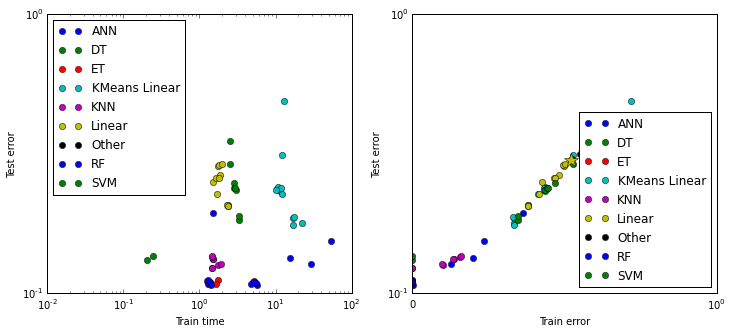

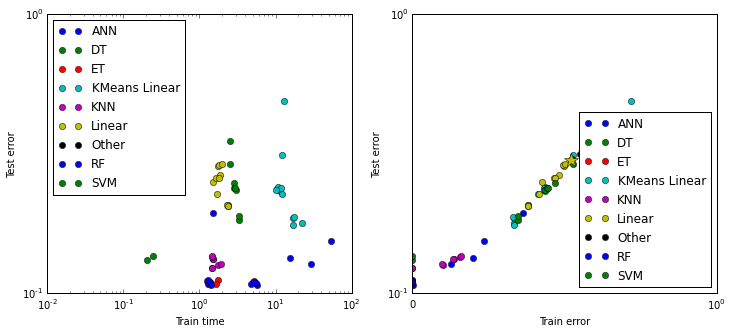

In [5]:
%pylab inline

import pylab as pl
from IPython import display
from IPython.core.display import HTML
    
fig, (ax1, ax2) = pl.subplots(1, 2, sharey=True, figsize=(12,5))
i = 1
display.display(HTML("<h2>Starting...</h2>"))
for run in tracker.run_models(starting_models(), splits): 
    plot_runs(fig, ax1, ax2, tracker, run)
    display.clear_output(wait=True)
    d = [HTML("<h2>Runs: " + str(i) + "</h2>"), 
         pl.gcf()]
    
    if (tracker.max_score == run['cv_score']): 
         d += [HTML('<h2>New Best: %s %.3f' % (run['model_type'], run['cv_score'])), 
         HTML("<p>" + run["model"] + "</p>")]
    else: 
         d += [HTML('<h2>Best: %s %.3f' % (tracker.best_model_type, tracker.max_score)), 
         HTML("<p>" + tracker.best_model + "</p>"), 
         HTML('<h2>Last: %s %.3f</h2>' % (run['model_type'], run['cv_score'])), 
         HTML("<p>" + run["model"] + "</p>")]
        
    
    display.display(*d)
    i = i + 1


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


ERROR:kaggle/forest:Run failed: 
ExtraTreesClassifier(bootstrap=False, class_weight='auto', criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Traceback (most recent call last):
  File "tracking.py", line 170, in run_model
    yield self.run_one(model, mtype, X_data, y_data, i_train, i_cv)
  File "tracking.py", line 198, in run_one
    run["train_score"] = model.score(X_train, y_train)
  File "C:\Users\gorej\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\base.py", line 295, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "C:\Users\gorej\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\ensemble\forest.py", line 462, in predict
    proba = self.predict_proba(X)
  File "C:\Users\gorej\AppData\Lo

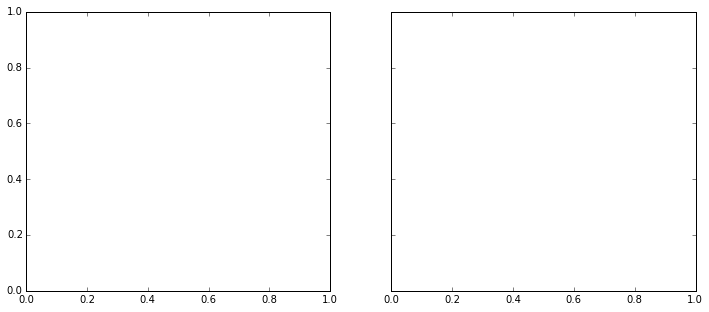

In [4]:
%pylab inline

import pylab as pl
from IPython import display
from IPython.core.display import HTML
    
from sklearn import ensemble, grid_search

def better_models():
    param_sets = grid_search.ParameterGrid({
        "n_estimators": [600], 
        "class_weight": ["auto", "subsample", None]})
    yield ensemble.ExtraTreesClassifier(n_jobs=-1), param_sets, "ET"
    yield ensemble.RandomForestClassifier(n_jobs=-1), param_sets, "RF"


fig, (ax1, ax2) = pl.subplots(1, 2, sharey=True, figsize=(12,5))
i = 1
display.display(HTML("<h2>Starting...</h2>"))
for run in tracker.run_models(better_models(), splits): 
    plot_runs(fig, ax1, ax2, tracker, run)
    display.clear_output(wait=True)
    d = [HTML("<h2>Runs: " + str(i) + "</h2>"), 
         pl.gcf()]
    
    if (tracker.max_score == run['cv_score']): 
         d += [HTML('<h2>New Best: %s %.3f' % (run['model_type'], run['cv_score'])), 
         HTML("<p>" + run["model"] + "</p>")]
    else: 
         d += [HTML('<h2>Best: %s %.3f' % (tracker.best_model_type, tracker.max_score)), 
         HTML("<p>" + tracker.best_model + "</p>"), 
         HTML('<h2>Last: %s %.3f</h2>' % (run['model_type'], run['cv_score'])), 
         HTML("<p>" + run["model"] + "</p>")]
        
    
    display.display(*d)
    i = i + 1

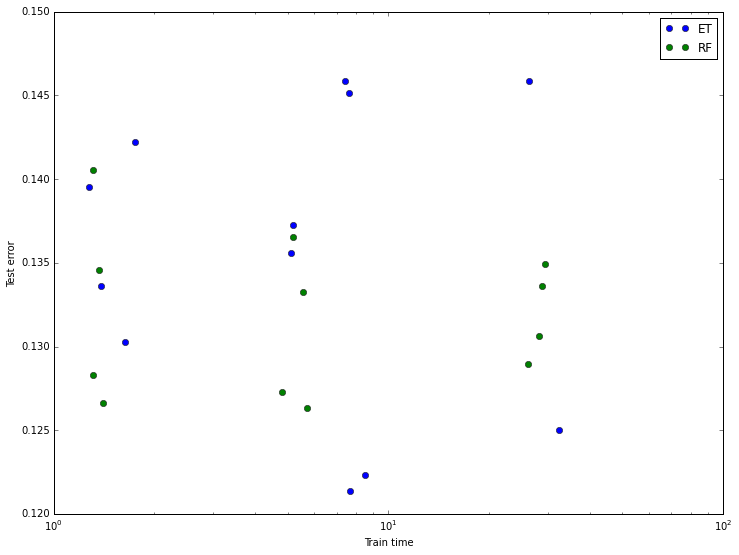

In [5]:
fig, ax1 = pl.subplots(figsize=(12,9))
ax1.set_xlabel("Train time")
ax1.set_xscale('log')
ax1.set_ylabel("Test error")

best_runs = tracker.runs[tracker.runs.cv_score > 0.85]

groups = best_runs.groupby(['model_type'])
for mtype, grp in groups:
    ax1.plot(
        grp['train_time'], 1-grp['cv_score'],
        'o', label=mtype)

ax1.legend(loc="auto")


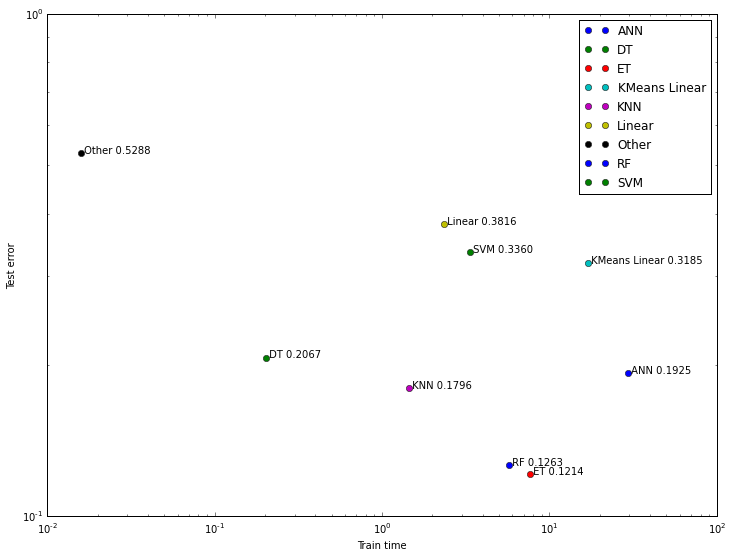

In [16]:
fig, ax1 = pl.subplots(figsize=(12,9))
ax1.set_xlabel("Train time")
ax1.set_xscale('log')
ax1.set_ylabel("Test error")
ax1.set_yscale('log')

groups = tracker.runs.groupby(['model_type'])
for mtype, grp in groups:
    midx = grp['cv_score'].idxmax()
    xy = (grp['train_time'][midx], 1-grp['cv_score'][midx])
    label = " %s %.4f" % (mtype, xy[1])
    ax1.annotate(label, xy=xy)
    ax1.plot(
        xy[0], xy[1],
        'o', label=mtype)
    

ax1.legend(loc="auto")

In [20]:
tracker.runs[['model_type', 'cv_score']][tracker.runs.cv_score > 0.85].sort(['cv_score'], ascending=False)

,model_type,cv_score
65,ET,0.878638
83,ET,0.877646
101,ET,0.875000
10,RF,0.873677
12,RF,0.873347
14,RF,0.872685
8,RF,0.871693
119,RF,0.871032
3,ET,0.869709
137,RF,0.869378
